In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn import metrics

knn_data = sns.load_dataset('penguins')

In [2]:
knn_data[knn_data.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [3]:
knn_data.drop(3,axis=0,inplace=True)
knn_data.drop(339,axis=0,inplace=True)

In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(knn_data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])

In [5]:
knn_data['bill_length_mm'] = x_scaled[:,0]
knn_data['bill_depth_mm'] = x_scaled[:,1]
knn_data['flipper_length_mm'] = x_scaled[:,2]
knn_data['body_mass_g'] = x_scaled[:,3]

In [6]:
species = {'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}
for name in species:
    knn_data['species'] = knn_data['species'].replace([name], species[name])

knn_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,1,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,1,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
4,1,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
5,1,Torgersen,0.261818,0.892857,0.305085,0.263889,Male
...,...,...,...,...,...,...,...
338,3,Biscoe,0.549091,0.071429,0.711864,0.618056,Female
340,3,Biscoe,0.534545,0.142857,0.728814,0.597222,Female
341,3,Biscoe,0.665455,0.309524,0.847458,0.847222,Male
342,3,Biscoe,0.476364,0.202381,0.677966,0.694444,Female


In [7]:
X_train, X_test,y_train,y_test = train_test_split(knn_data[['bill_length_mm','bill_depth_mm']],knn_data['species'],test_size=0.25, random_state=0)

In [8]:
#x_train, x_test,y_train,y_test = train_test_split(deskryptory, zmienna_zalezna, train_size=0.25, random_state=0)
X_train, X_test,y_train,y_test = train_test_split(knn_data[['bill_length_mm','bill_depth_mm']],knn_data['species'],test_size=0.25, random_state=0)


The optimal number of neighbours is 5.


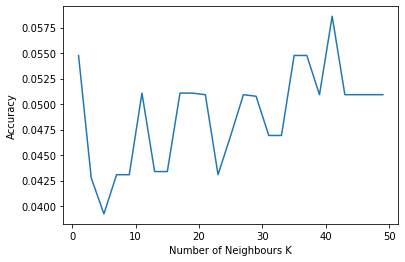

In [9]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import KFold
dane_kfold = KFold(n_splits=10,shuffle=True, random_state=0)

myList = list(range(0,50))
neighbours = list(filter(lambda x: x %2 != 0, myList))

cv_scores = []

for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]

optimal_k = neighbours[MSE.index(min(MSE))]
print('\nThe optimal number of neighbours is %d.' % optimal_k)

plt.plot(neighbours, MSE)
plt.xlabel('Number of Neighbours K')
plt.ylabel('Accuracy')
plt.show()

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        44
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00        29

    accuracy                           0.99        86
   macro avg       0.99      0.97      0.98        86
weighted avg       0.99      0.99      0.99        86



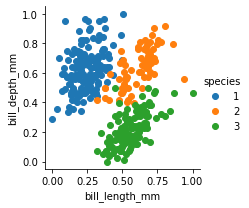

In [10]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

sns.FacetGrid(knn_data,hue="species").map(plt.scatter,'bill_length_mm','bill_depth_mm').add_legend()

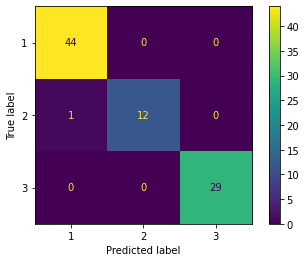

In [11]:
plot_confusion_matrix(knn, X_test, y_test)

In [12]:
knn_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,1,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,1,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
4,1,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
5,1,Torgersen,0.261818,0.892857,0.305085,0.263889,Male


In [13]:
X_train, X_test,y_train,y_test = train_test_split(knn_data[['bill_length_mm','bill_depth_mm','flipper_length_mm']],knn_data['body_mass_g'],test_size=0.25, random_state=0)


In [14]:
knn_regress = KNeighborsRegressor(n_neighbors=5)

#Train the model using the training sets
knn_regress.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn_regress.predict(X_test)

RMSE value for k=  1 is 0.12397295556820837
RMSE value for k=  2 is 0.10577197570970989
RMSE value for k=  3 is 0.10374051503053128
RMSE value for k=  4 is 0.10104814583149634
RMSE value for k=  5 is 0.10296126421104049
RMSE value for k=  6 is 0.10238191951558034
RMSE value for k=  7 is 0.10114256940000717
RMSE value for k=  8 is 0.10222938278519193
RMSE value for k=  9 is 0.10107418539355571
RMSE value for k=  10 is 0.10254478641200751
RMSE value for k=  11 is 0.10220929080828837
RMSE value for k=  12 is 0.10249883139505768
RMSE value for k=  13 is 0.10212756053904765
RMSE value for k=  14 is 0.10107556364726429
RMSE value for k=  15 is 0.10158091999492339
RMSE value for k=  16 is 0.10176819823511075
RMSE value for k=  17 is 0.10057313171928904
RMSE value for k=  18 is 0.10113104494401037
RMSE value for k=  19 is 0.10195614207138881
RMSE value for k=  20 is 0.10130232983652412
RMSE value for k=  21 is 0.10112944967855435
RMSE value for k=  22 is 0.10135123009765232
RMSE value for k=  

Text(0, 0.5, 'Root Mean Squared Error')

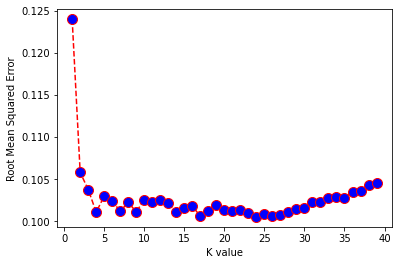

In [15]:
from sklearn import neighbors   
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val = [] 
for k in range(1,40):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred_k))
    rmse_val.append(error)
    print('RMSE value for k= ',k,'is',error)

plt.figure()
plt.plot(range(1,40),rmse_val, color='red',
        linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'blue', markersize=10)

plt.xlabel('K value')
plt.ylabel('Root Mean Squared Error')

In [16]:
pred1 = knn.predict(X_train)
pred2= knn.predict(X_test)

r2 = metrics.r2_score(y_train,pred1)
q2 = metrics.r2_score(y_test,pred2)

rmse = np.sqrt(metrics.mean_squared_error(y_train,pred1))
rmse_ex = np.sqrt(metrics.mean_squared_error(y_test,pred2))

print(f'r2: {r2}, q2: {q2}, rmse: {rmse}, rmse_ex: {rmse_ex}')

r2: 0.8499219151881385, q2: 0.7440599103531246, rmse: 0.08812097725799749, rmse_ex: 0.104501868039956


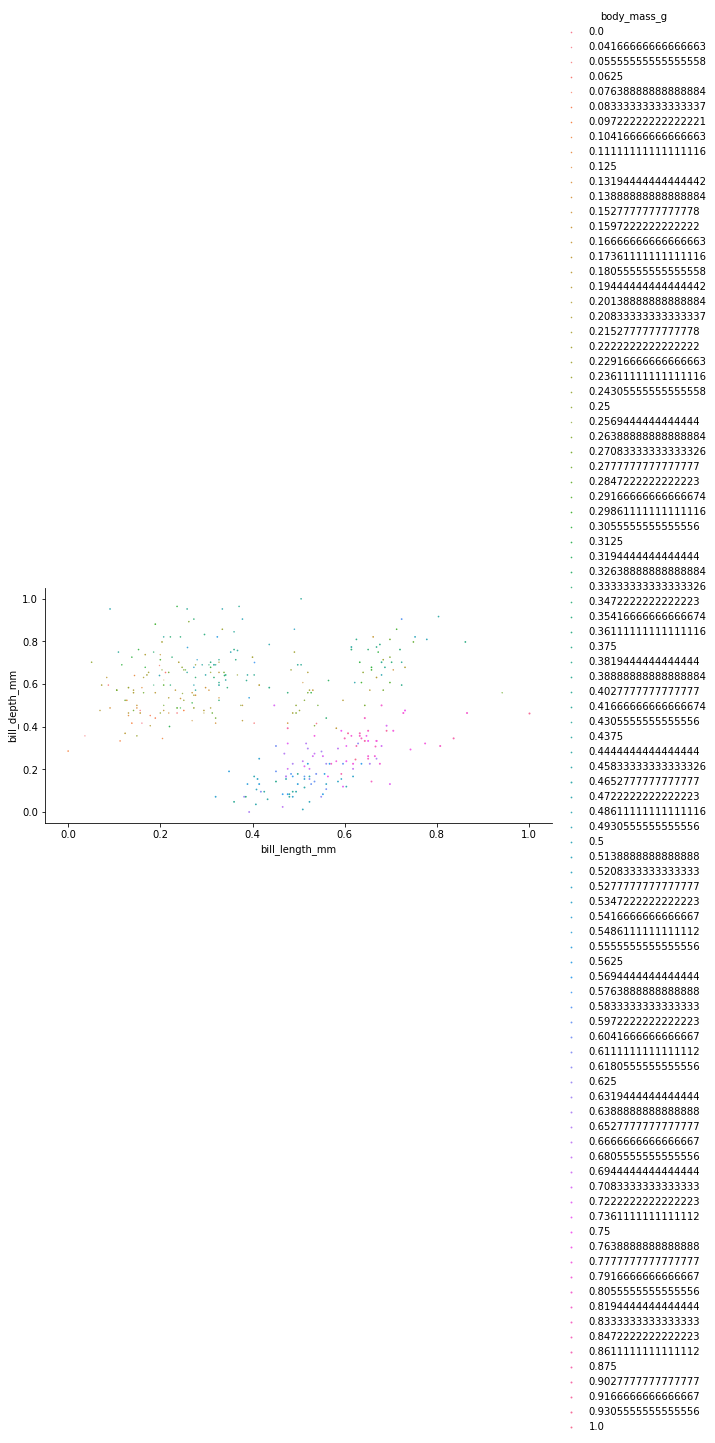

In [17]:
sns.FacetGrid(knn_data,height = 4,aspect= 2 ,hue="body_mass_g").map(plt.scatter,'bill_length_mm','bill_depth_mm','flipper_length_mm').add_legend()

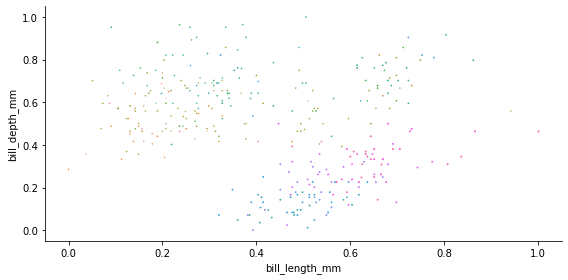

In [18]:
sns.FacetGrid(knn_data,height = 4,aspect= 2 ,hue="body_mass_g").map(plt.scatter,'bill_length_mm','bill_depth_mm','flipper_length_mm')